# <div style="text-align: left; background-color:#45C7EF; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">KHÁM PHÁ DỮ LIỆU TRÊN TẬP DỮ DIỆU BIGDS</div>

📝 Import các thư viện cần thiết

In [95]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from pathlib import Path  

📝 Đọc file BigDS.csv và in ra 5 dòng đầu tiên của bộ dữ liệu

In [96]:
df_BigDS = pd.read_csv('./raw_data/BigDS.csv')
table = tabulate(df_BigDS, headers='keys', tablefmt='fancy_grid')
print(table)

╒══════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╤════════════════════════════════════════════════════╤════════════╤════════════════╤═════════════════╤════════════╤═══════════════╤══════════╤═══════════════════╤════════════════════╤════════════════╤════════════╤═══════════╕
│      │ DiaChi                                                                                                                                                                                           │ GiaBan          │ DuAn                                               │ DienTich   │ TinhTrangBDS   │ Gia/m2          │ PhongNgu   │ PhongVeSinh   │   SoTang │ TinhTrangGiayTo   │ TinhTrangNoiThat   │ HuongBanCong   │ HuongCua   │ DacDiem   │
╞══════╪════════════════════════════════════════════════════════════════════════════════════════════════════

📝 Số dòng và số cột của bộ dữ liệu

In [97]:
ds_rows, ds_cols = df_BigDS.shape
print(f'Số hàng: {ds_rows}\nSố cột: {ds_cols}')

Số hàng: 7973
Số cột: 14


📝 Hiển thị kiểu dữ liệu và số lượng của từng cột trong bộ dữ liệu

In [98]:
df_BigDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            7973 non-null   object 
 1   GiaBan            7973 non-null   object 
 2   DuAn              5711 non-null   object 
 3   DienTich          7973 non-null   object 
 4   TinhTrangBDS      7973 non-null   object 
 5   Gia/m2            7973 non-null   object 
 6   PhongNgu          7973 non-null   object 
 7   PhongVeSinh       6683 non-null   object 
 8   SoTang            2440 non-null   float64
 9   TinhTrangGiayTo   2294 non-null   object 
 10  TinhTrangNoiThat  1591 non-null   object 
 11  HuongBanCong      1251 non-null   object 
 12  HuongCua          1908 non-null   object 
 13  DacDiem           330 non-null    object 
dtypes: float64(1), object(13)
memory usage: 872.2+ KB


📝 Xem số lượng giá trị duy nhất trong mỗi cột

In [99]:
print(df_BigDS.nunique())

DiaChi              2307
GiaBan              1082
DuAn                 553
DienTich             587
TinhTrangBDS           2
Gia/m2              3401
PhongNgu              10
PhongVeSinh            6
SoTang                46
TinhTrangGiayTo        3
TinhTrangNoiThat       4
HuongBanCong           8
HuongCua               8
DacDiem                1
dtype: int64


📝 Kiểm tra xem có dòng nào bị lặp không

In [100]:
num_duplicated_rows = df_BigDS.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
print(is_duplicated)

So dong lap la 0
False


📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'Gia/m2' của DataFrame 'df_BigDS'

In [101]:
num_NaN = df_BigDS['Gia/m2'].isnull().sum()
num_NaN

0

📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'PhongVeSinh' của DataFrame 'df_BigDS'

In [102]:
#Đếm số lượng giá trị thiếu (NaN) trong cột 'PhongVeSinh' của DataFrame 'df_BigDS'
num_NaN = df_BigDS['PhongVeSinh'].isnull().sum()
num_NaN

1290

📝 Biểu đồ ma trận

<AxesSubplot:>

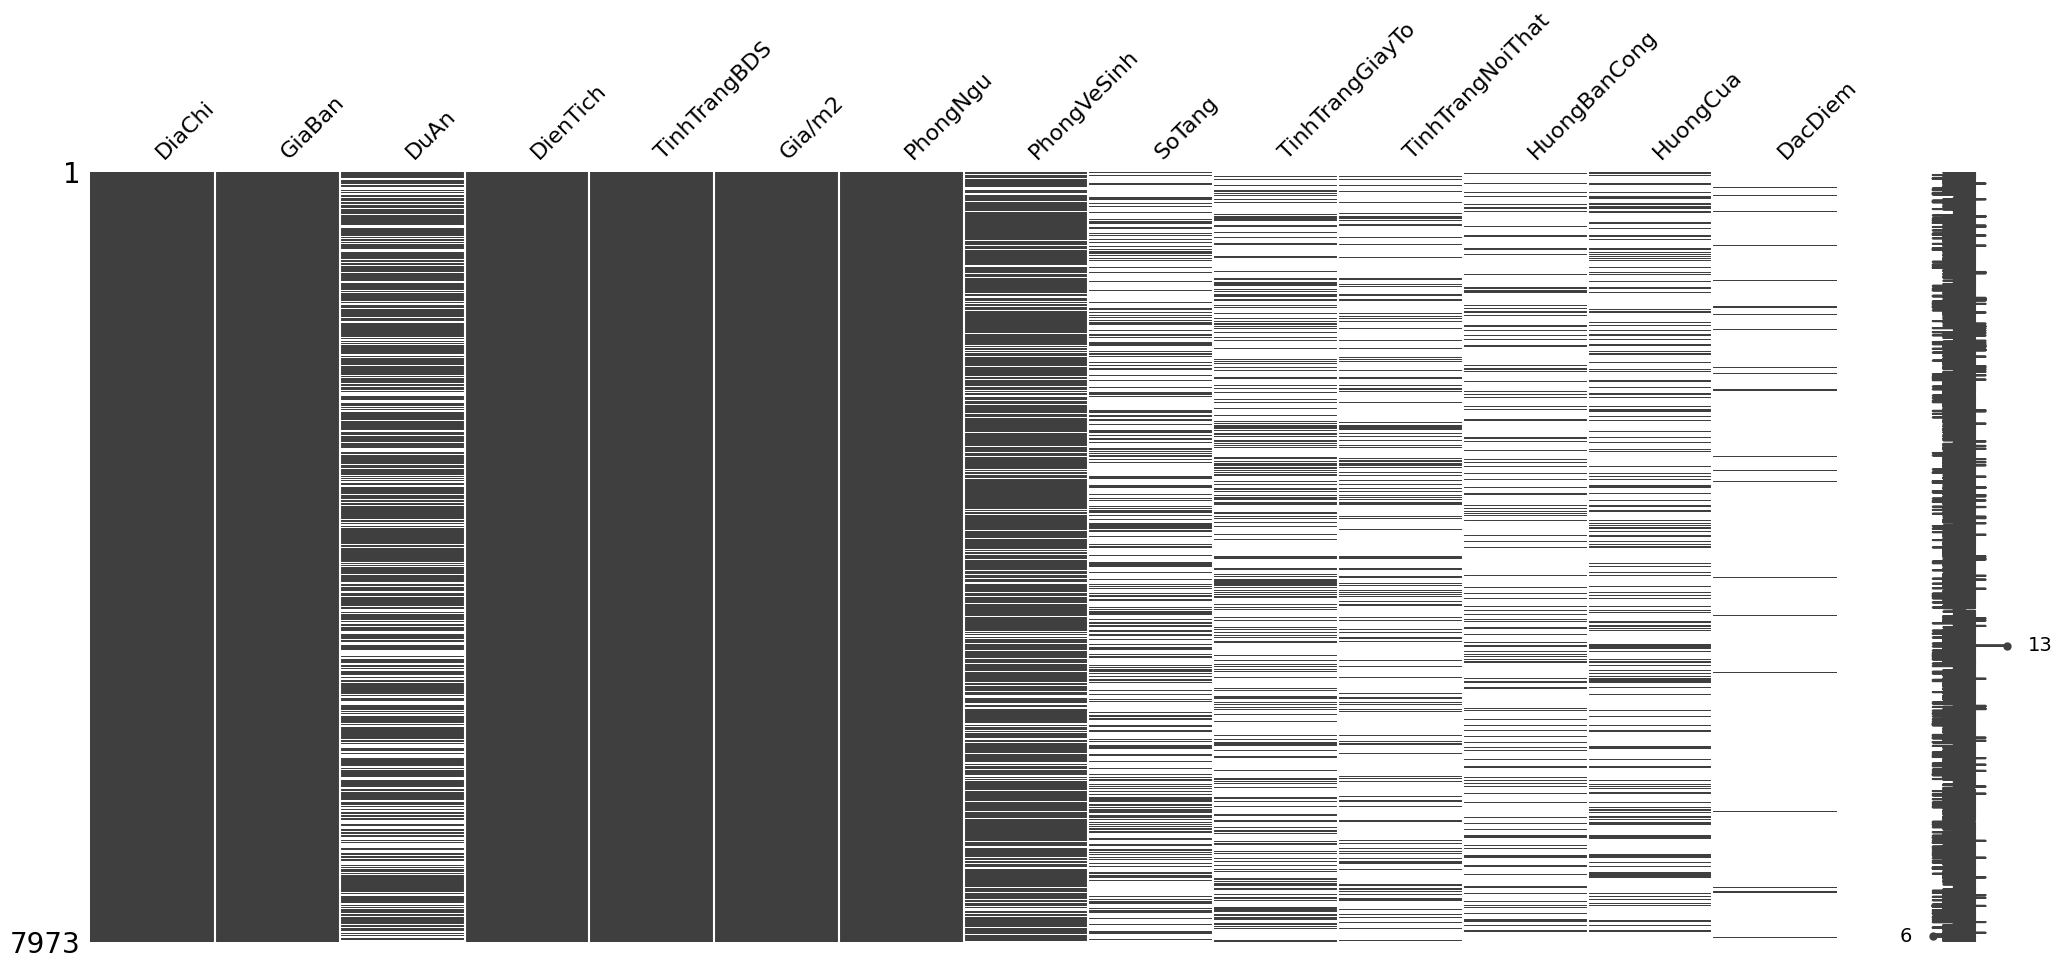

In [103]:
import missingno as msno

msno.matrix(df_BigDS)

📝 Đếm số lượng giá trị thiếu (NaN) trong cột 'Gia/m2' của DataFrame 'df_BigDS'

In [104]:
missing_ratio = df_BigDS.isnull().sum()
missing_ratio = missing_ratio / ds_rows
missing_ratio

DiaChi              0.000000
GiaBan              0.000000
DuAn                0.283708
DienTich            0.000000
TinhTrangBDS        0.000000
Gia/m2              0.000000
PhongNgu            0.000000
PhongVeSinh         0.161796
SoTang              0.693967
TinhTrangGiayTo     0.712279
TinhTrangNoiThat    0.800452
HuongBanCong        0.843095
HuongCua            0.760692
DacDiem             0.958610
dtype: float64

📝 Tỉ lệ giá trị thiếu trong mỗi cột

In [105]:
missing_ratio = df_BigDS.isnull().sum() / len(df_BigDS) * 100
missing_ratio_df = pd.DataFrame(missing_ratio, columns=['Missing Ratio'])
styled_missing_ratio = missing_ratio_df.style\
    .apply(lambda x: ['background: #89C6E9; color: black' if v > 0 else '' for v in x],
           axis=0)
# Hiển thị tỷ lệ giá trị thiếu với màu và chữ đen
print("Tỷ lệ giá trị thiếu trong mỗi cột:")
styled_missing_ratio

Tỷ lệ giá trị thiếu trong mỗi cột:


📝 Thống kê mô tả của từng cột

In [106]:
description = df_BigDS.describe()
styled_description = description.style\
    .set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description


In [107]:
cate_col_df = df_BigDS.select_dtypes(exclude=['float64', 'float32', 'int64', 'int32'])
# Thống kê mô tả của các cột không phải số
description = cate_col_df.describe()
styled_description = description.style\
    .set_properties(**{'background-color':'#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description

In [108]:
def missing_ratio(df_BigDS):
    return (df_BigDS.isna().mean() * 100).round(1)
def num_values(df_BigDS):
    return df_BigDS.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df_BigDS.agg([missing_ratio, num_values, value_ratios])

DiaChi  \
missing_ratio                                                0.0   
num_values                                                  2307   
value_ratios   {'Nguyễn Xiển, Phường Long Thạnh Mỹ (Quận 9 cũ...   

                                                          GiaBan  \
missing_ratio                                                0.0   
num_values                                                  1082   
value_ratios   {'2,5 tỷ': 2.1, '2,1 tỷ': 1.9, '2,7 tỷ': 1.8, ...   

                                                            DuAn  \
missing_ratio                                               28.4   
num_values                                                   553   
value_ratios   {'Vinhomes Grand Park': 3.4, 'Saigon Riverside...   

                                                        DienTich  \
missing_ratio                                                0.0   
num_values                                                   587   
value_ratios   {'70 m²': 4.1, '65 m²': 3.4, '75 m²': 3.3, '68...   

                                               TinhTrangBDS  \
missing_ratio                                           0.0   
num_values                                                2   
value_ratios   {'Đã bàn giao': 77.7, 'Chưa bàn giao': 22.3}   

                                                          Gia/m2  \
missing_ratio                                                0.0   
num_values                                                  3401   
value_ratios   {'50 triệu/m²': 0.8, '40 triệu/m²': 0.8, '30 t...   

                                                        PhongNgu  \
missing_ratio                                                0.0   
num_values                                                    10   
value_ratios   {'2 phòng': 67.5, '3 phòng': 16.8, '1 phòng': ...   

                                                     PhongVeSinh  \
missing_ratio                                               16.2   
num_values                                                     6   
value_ratios   {'2 phòng': 68.5, '1 phòng': 26.8, '3 phòng': ...   

                                                          SoTang  \
missing_ratio                                               69.4   
num_values                                                    46   
value_ratios   {9.0: 7.5, 10.0: 6.9, 3.0: 6.5, 8.0: 6.3, 12.0...   

                                                 TinhTrangGiayTo  \
missing_ratio                                               71.2   
num_values                                                     3   
value_ratios   {'Đã có sổ': 77.4, 'Đang chờ sổ': 16.9, 'Giấy ...   

                                                TinhTrangNoiThat  \
missing_ratio                                               80.0   
num_values                                                     4   
value_ratios   {'Nội thất đầy đủ': 47.7, 'Nhà trống': 30.0, '...   

                                                    HuongBanCong  \
missing_ratio                                               84.3   
num_values                                                     8   
value_ratios   {'Đông Nam': 31.7, 'Đông Bắc': 13.5, 'Đông': 1...   

                                                        HuongCua  \
missing_ratio                                               76.1   
num_values                                                     8   
value_ratios   {'Tây Bắc': 17.7, 'Đông Nam': 16.5, 'Nam': 12....   

                          DacDiem  
missing_ratio                95.9  
num_values                      1  
value_ratios   {'Căn góc': 100.0}

In [109]:
#xử lý cho cột 'Gia/m2'.
list_val1=df_BigDS['Gia/m2'].values.tolist()
list_unit1=[]
for i in list_val1:
    list_unit1.append(i.split(" ",1)[1])
#Xử lý cho cột 'DienTich'
list_val2=df_BigDS['DienTich'].values.tolist()
list_unit2=[]
for i in list_val2:
    list_unit2.append(i.split(" ",1)[1])  
#Xử lý cho cột 'GiaBan'
list_val3=df_BigDS['GiaBan'].values.tolist()
list_unit3=[]
for i in list_val3:
    list_unit3.append(i.split(" ",1)[1])
print(f"Các đơn vị của cột 'Gia/m2':", set(list_unit1))
print(f"Các đơn vị của cột 'DienTich':", set(list_unit2))
print(f"Các đơn vị của cột 'GiaBan':", set(list_unit3))

Các đơn vị của cột 'Gia/m2': {'tỷ/m²', 'đ/m²', 'triệu/m²'}
Các đơn vị của cột 'DienTich': {'m²'}
Các đơn vị của cột 'GiaBan': {'đ', 'triệu', 'tỷ'}


In [110]:
df_BigDS["DienTich"].unique()

array(['99.9 m²', '99.38 m²', '99.3 m²', '99 m²', '98.92 m²', '98.5 m²',
       '98.1 m²', '98 m²', '97.49 m²', '97.43 m²', '97.3 m²', '97 m²',
       '96.8 m²', '96.5 m²', '96 m²', '95.7 m²', '95.6 m²', '95.2 m²',
       '95 m²', '94.89 m²', '94.7 m²', '94 m²', '93.6 m²', '93.5 m²',
       '93.3 m²', '93 m²', '92.72 m²', '92.6 m²', '92.5 m²', '92.4 m²',
       '92.03 m²', '92 m²', '91.8 m²', '91.56 m²', '91.5 m²', '91.3 m²',
       '91.2 m²', '91 m²', '90.69 m²', '90.55 m²', '90.4 m²', '90 m²',
       '89.9 m²', '89 m²', '886 m²', '88.8 m²', '88.2 m²', '88 m²',
       '87.8 m²', '87.77 m²', '87.7 m²', '87.6 m²', '87.5 m²', '87.3 m²',
       '87.1 m²', '87 m²', '86.6 m²', '86.3 m²', '86.2 m²', '86 m²',
       '85.4 m²', '85.2 m²', '85 m²', '84.2 m²', '84 m²', '83.6 m²',
       '83.3 m²', '83 m²', '82.8 m²', '82.74 m²', '82.6 m²', '82.5 m²',
       '82.3 m²', '82.2 m²', '82 m²', '81.9 m²', '81.5 m²', '81.2 m²',
       '81.1 m²', '81 m²', '80.8 m²', '80.5 m²', '80.4 m²', '80 m²',
       

In [111]:
df_BigDS["DienTich"] =df_BigDS["DienTich"].str.replace('m²','')
df_BigDS["DienTich"] = pd.to_numeric(df_BigDS["DienTich"],errors='coerce')
df_BigDS.rename(columns={'DienTich':'DienTich(m2)'},inplace=True)
df_BigDS['DienTich(m2)']

0       99.9
1       99.9
2       99.9
3       99.9
4       99.9
        ... 
7968    10.0
7969    10.0
7970    10.0
7971    10.0
7972    10.0
Name: DienTich(m2), Length: 7973, dtype: float64

In [112]:
df_BigDS["GiaBan"].unique()

array(['4,044135891 tỷ', '1,2 tỷ', '1,35 tỷ', ..., '3,64 tỷ', '4,255 tỷ',
       '5,333333333 tỷ'], dtype=object)

In [113]:
df_BigDS['GiaBan'] = df_BigDS['GiaBan'].str.replace(',', '.')  # Xóa dấu phẩy
# Lặp qua từng hàng của cột GiaBan
for index, row in df_BigDS.iterrows():
    gia_ban = row['GiaBan']
    if 'tỷ' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là tỷ
        gia_ban = gia_ban.replace(' tỷ', '')  # Xóa ký tự ' tỷ'
    elif 'triệu' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là triệu
        gia_ban = gia_ban.replace(' triệu', '')  # Xóa ký tự ' triệu'
        gia_ban = float(gia_ban) / 1000  # Chia cho 1000 để chuyển đổi từ triệu sang tỷ
    elif 'đ' in gia_ban:  # Kiểm tra nếu giá trị có đơn vị là đồng
        gia_ban = gia_ban.replace(' đ', '')  # Xóa ký tự ' đ'
        gia_ban = float(gia_ban) / 1000000000  # Chia cho 1 tỷ để chuyển đổi từ đồng sang tỷ
    df_BigDS.at[index, 'GiaBan'] = gia_ban
# Chuyển đổi cột GiaBan sang kiểu số
df_BigDS['GiaBan'] = pd.to_numeric(df_BigDS['GiaBan'])
print(df_BigDS['GiaBan'])

0       4.044136
1       1.200000
2       1.200000
3       1.200000
4       1.350000
          ...   
7968    1.800000
7969    1.500000
7970    1.900000
7971    1.600000
7972    1.150000
Name: GiaBan, Length: 7973, dtype: float64


In [114]:
df_BigDS["PhongNgu"].unique()

array(['3 phòng', '1 phòng', '4 phòng', '2 phòng', '10 phòng', '6 phòng',
       '5 phòng', '9 phòng', '7 phòng', '8 phòng'], dtype=object)

In [115]:
df_BigDS["PhongNgu"] = df_BigDS["PhongNgu"].str.replace('phòng', '')
df_BigDS["PhongNgu"] = df_BigDS["PhongNgu"].astype('float64')
df_BigDS['PhongNgu']

0       3.0
1       3.0
2       1.0
3       3.0
4       3.0
       ... 
7968    2.0
7969    2.0
7970    2.0
7971    2.0
7972    1.0
Name: PhongNgu, Length: 7973, dtype: float64

In [116]:
df_BigDS["PhongVeSinh"].unique()

array([nan, '1 phòng', '3 phòng', '2 phòng', '6 phòng', '5 phòng',
       '4 phòng'], dtype=object)

In [117]:
df_BigDS["PhongVeSinh"] = df_BigDS["PhongVeSinh"].str.replace('phòng', '')
df_BigDS["PhongVeSinh"] = df_BigDS["PhongVeSinh"].astype('float64')
df_BigDS['PhongVeSinh']

0       NaN
1       NaN
2       1.0
3       3.0
4       3.0
       ... 
7968    NaN
7969    NaN
7970    NaN
7971    NaN
7972    1.0
Name: PhongVeSinh, Length: 7973, dtype: float64

In [118]:
df_BigDS["Gia/m2"].unique()

array(['40,48 triệu/m²', '12,01 triệu/m²', '13,51 triệu/m²', ...,
       '150 triệu/m²', '190 triệu/m²', '115 triệu/m²'], dtype=object)

In [119]:
def convert_price_per_square(price):
    if 'triệu/m²' in price:
        price = price.replace('triệu/m²', '').replace(',', '.')
        return float(price)
    if 'tỷ/m²' in price:
        price = price.replace('tỷ/m²', '').replace(',', '.')
        return float(price) * 1000
    if 'đ/m²' in price:
        price = price.replace('đ/m²', '').replace(',', '.')
        return float(price) / 1000
    return None
df_BigDS['Gia/m2'] = df_BigDS['Gia/m2'].apply(convert_price_per_square)

In [120]:
(df_BigDS['Gia/m2']).head(115)


0       40.48
1       12.01
2       12.01
3       12.01
4       13.51
        ...  
110     32.99
111     45.88
112      4.12
113     19.75
114    128.87
Name: Gia/m2, Length: 115, dtype: float64

In [121]:
df_filtered = df_BigDS[(df_BigDS['GiaBan'] <= 0.05)]
print(df_filtered)

                                                 DiaChi        GiaBan  \
390   số 88, N1, Phường Sơn Kỳ, Quận Tân Phú, Tp Hồ ...  4.250000e-03   
412   Đường A8, Phường Bình Hưng Hoà B, Quận Bình Tâ...  2.500000e-03   
470   Võ Chí Công, Phường Phú Hữu (Quận 9 cũ), Thành...  3.000000e-03   
529   Số 510, Kinh Dương Vương, Phường An Lạc A, Quậ...  3.500000e-03   
914   196, 196 Số 195 Cao Lỗ, phường 4, quận 8, Tp.H...  1.000000e-02   
1065  C19-04, Đường Số 9A, Xã Bình Chánh, Huyện Bình...  3.900000e-02   
1069  15A1, Nguyễn Hữu Thọ, Xã Phước Kiển, Huyện Nhà...  2.750000e-03   
1376  Đường Số 9A, Xã Bình Chánh, Huyện Bình Chánh, ...  3.100000e-03   
2004       Lý Nam Đế, Phường 7, Quận 11, Tp Hồ Chí Minh  2.050000e-03   
2155  306 vuon lai, Phường Phú Thọ Hòa, Quận Tân Phú...  2.480000e-03   
2300  Nguyễn Văn Quá, Phường Tân Hưng Thuận, Quận 12...  2.400000e-03   
2674     Võ Văn Kiệt, Phường 16, Quận 8, Tp Hồ Chí Minh  2.450000e-03   
2732  Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận

In [122]:
df_BigDS.drop(df_filtered.index, inplace=True)
df_BigDS.reset_index(drop=True, inplace=True)
print(df_BigDS)

                                                 DiaChi    GiaBan  \
0     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  4.044136   
1     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   
2     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   
3     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   
4     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.350000   
...                                                 ...       ...   
7913  Đường Hòa Bình, Phường Hiệp Tân, Quận Tân Phú,...  1.800000   
7914  Hẻm 11 Đường 3 Tháng 2, Phường 12, Quận 10, Tp...  1.500000   
7915  Đường Nguyễn Văn Linh, Phường Tân Phong, Quận ...  1.900000   
7916  Song Hành, Phường Phú Hữu (Quận 9 cũ), Thành p...  1.600000   
7917  Nguyễn Văn Linh, Phường 7, Quận 8, Tp Hồ Chí Minh  1.150000   

                   DuAn  DienTich(m2)   TinhTrangBDS  Gia/m2  PhongNgu  \
0      MT Eastmark City          99.9  Chưa bàn giao   40.48       3.0   
1      MT Eastmark City

In [123]:
df_filtered2 = df_BigDS[df_BigDS['DienTich(m2)'] < 5.00]
print(df_filtered2)

                                                 DiaChi  GiaBan  \
6978  34A, Phạm Thế Hiển, Phường 8, Quận 8, Tp Hồ Ch...    2.50   
7080  Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7, Tp Hồ...    1.48   
7081  Số 01, 104A, Phường Bình Trưng Tây (Quận 2 cũ)...    2.37   

                                DuAn  DienTich(m2)   TinhTrangBDS   Gia/m2  \
6978                             NaN           3.5  Chưa bàn giao   714.29   
7080                    Sunrise City           2.0    Đã bàn giao   740.00   
7081  Diamond Island (Đảo Kim Cương)           2.0    Đã bàn giao  1185.00   

      PhongNgu  PhongVeSinh  SoTang TinhTrangGiayTo TinhTrangNoiThat  \
6978       1.0          1.0     1.0             NaN              NaN   
7080       2.0          2.0    16.0        Đã có sổ              NaN   
7081       2.0          NaN     NaN             NaN              NaN   

     HuongBanCong HuongCua DacDiem  
6978          NaN  Tây Nam     NaN  
7080          NaN      NaN     NaN  
7081          NaN 

In [124]:
df_BigDS.drop(df_filtered2.index, inplace=True)
df_BigDS.reset_index(drop=True, inplace=True)
print(df_BigDS)

                                                 DiaChi    GiaBan  \
0     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  4.044136   
1     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   
2     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   
3     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   
4     Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.350000   
...                                                 ...       ...   
7910  Đường Hòa Bình, Phường Hiệp Tân, Quận Tân Phú,...  1.800000   
7911  Hẻm 11 Đường 3 Tháng 2, Phường 12, Quận 10, Tp...  1.500000   
7912  Đường Nguyễn Văn Linh, Phường Tân Phong, Quận ...  1.900000   
7913  Song Hành, Phường Phú Hữu (Quận 9 cũ), Thành p...  1.600000   
7914  Nguyễn Văn Linh, Phường 7, Quận 8, Tp Hồ Chí Minh  1.150000   

                   DuAn  DienTich(m2)   TinhTrangBDS  Gia/m2  PhongNgu  \
0      MT Eastmark City          99.9  Chưa bàn giao   40.48       3.0   
1      MT Eastmark City

In [125]:
print(f"Dữ liệu sau khi chuyển đổi")
df_BigDS.dtypes

Dữ liệu sau khi chuyển đổi


DiaChi               object
GiaBan              float64
DuAn                 object
DienTich(m2)        float64
TinhTrangBDS         object
Gia/m2              float64
PhongNgu            float64
PhongVeSinh         float64
SoTang              float64
TinhTrangGiayTo      object
TinhTrangNoiThat     object
HuongBanCong         object
HuongCua             object
DacDiem              object
dtype: object

In [126]:
df = df_BigDS.copy()
addr = []
for i in range(len(df['DiaChi'])):
    a = df.DiaChi[i].split(',')
    temp = []
    for j in a:
        if 'Huyện' in j:
            temp.append(j)
        if 'Quận' in j:
            temp.append(j)
        if 'Thủ Đức' in j:
            temp.append(j)
    addr.append(temp[-1])
df_BigDS['Quan'] = addr
df_BigDS.head(2)


DiaChi    GiaBan  \
0  Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  4.044136   
1  Trường Lưu, Phường Long Trường (Quận 9 cũ), Th...  1.200000   

               DuAn  DienTich(m2)   TinhTrangBDS  Gia/m2  PhongNgu  \
0  MT Eastmark City          99.9  Chưa bàn giao   40.48       3.0   
1  MT Eastmark City          99.9  Chưa bàn giao   12.01       3.0   

   PhongVeSinh  SoTang TinhTrangGiayTo TinhTrangNoiThat HuongBanCong HuongCua  \
0          NaN     NaN             NaN              NaN          NaN      NaN   
1          NaN     NaN             NaN              NaN          NaN      NaN   

  DacDiem                Quan  
0     NaN   Thành phố Thủ Đức  
1     NaN   Thành phố Thủ Đức

In [127]:
numeric_df = df_BigDS.copy()
numeric_df = numeric_df[['GiaBan', 'DienTich(m2)', 'Gia/m2', 'PhongNgu', 'PhongVeSinh','SoTang']]
columns = list(numeric_df.columns)
titles = ['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']
arrays = numeric_df.to_numpy()
num_col_dict = {}
for i in range(len(columns)):
    column = columns[i]
    missing_ratio = (sum(pd.isnull(numeric_df[column])) / numeric_df.shape[0]) * 100
    min_val = np.nanmin(arrays[:, i]).round(1)
    lower_quartile = np.nanpercentile(arrays[:, i], 25).round(3)
    median = np.nanpercentile(arrays[:, i], 50).round(3)
    upper_quartile = np.nanpercentile(arrays[:, i], 75).round(3)
    max_val = np.nanmax(arrays[:, i]).round(3)
    num_col_dict[column] = [missing_ratio, min_val, lower_quartile, median, upper_quartile, max_val]
num_col_dict['titles'] = titles
numeric_info_df = pd.DataFrame(num_col_dict).set_index('titles')
numeric_info_df.style.set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})


In [128]:
filepath = Path('./clean_data/clean_BigDS.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_BigDS.to_csv(filepath, encoding='utf-8-sig')